In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load and inspect dataset
df = pd.read_csv("/content/drive/MyDrive/paper/archive (2).zip")
print(df.head())
print(df.info())
print(df.isnull().sum())
# Remove missing or blank values
df.dropna(inplace=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoders = {}
for column in df.select_dtypes(include=['object']):
    if column != 'customerID':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Drop irrelevant columns
df.drop(['customerID'], axis=1, inplace=True)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

X = df.drop("Churn", axis=1)
y = df["Churn"]

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))



Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407


Random Forest Results:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:13:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Results:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    print(f"\n{name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))



Logistic Regression:
Accuracy: 0.7853589196872779
Precision: 0.6208053691275168
Recall: 0.4946524064171123
ROC-AUC: 0.8307380507426062

Random Forest:
Accuracy: 0.7903340440653873
Precision: 0.6405693950177936
Recall: 0.48128342245989303
ROC-AUC: 0.813891577928364

XGBoost:
Accuracy: 0.7775408670931059
Precision: 0.5950155763239875
Recall: 0.5106951871657754
ROC-AUC: 0.8071656718658597


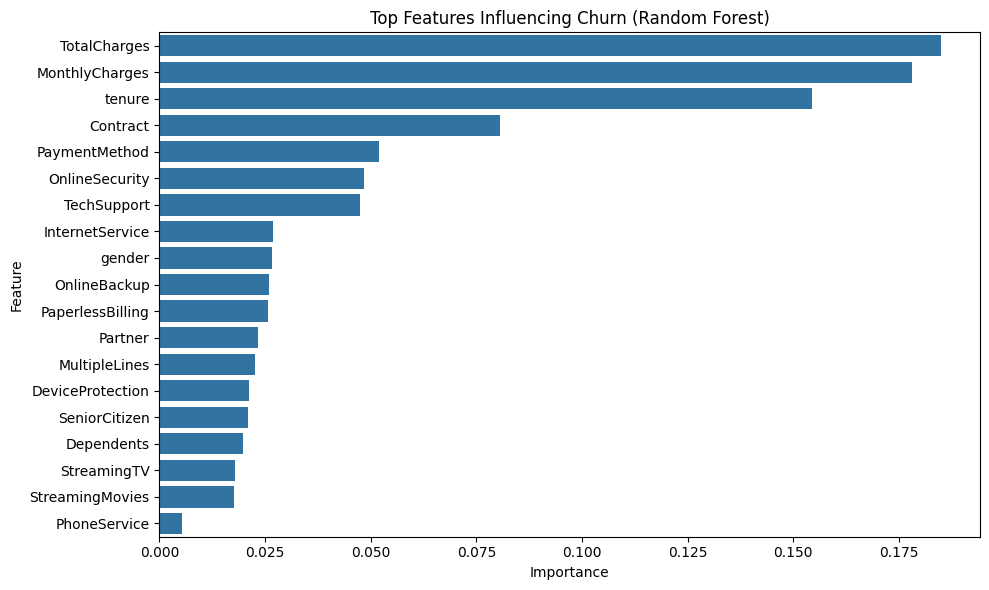

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

rf = models["Random Forest"]
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Top Features Influencing Churn (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the dataset (ensure the CSV path is correct)
df = pd.read_csv("/content/drive/MyDrive/paper/archive (2).zip")

# Optional cleaning if necessary
df.dropna(inplace=True)

# Convert 'TotalCharges' to numeric (often needed in Telco dataset)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder

for column in df.select_dtypes(include='object'):
    if column != 'customerID':
        df[column] = LabelEncoder().fit_transform(df[column])

# Drop 'customerID' if it exists
df.drop(['customerID'], axis=1, inplace=True)



In [ ]:
X = df.drop("Churn", axis=1)
y = df["Churn"]


In [ ]:
# Prepare data
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Save predictions
pred_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Churn_Probability': y_proba
})

pred_df.to_csv("churn_predictions.csv", index=False)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Generate synthetic data
np.random.seed(42)
n_samples = 1000

df = pd.DataFrame({
    'customerID': ['CUST' + str(i).zfill(5) for i in range(n_samples)],
    'gender': np.random.choice(['Male', 'Female'], n_samples),
    'SeniorCitizen': np.random.choice([0, 1], n_samples),
    'Partner': np.random.choice(['Yes', 'No'], n_samples),
    'Dependents': np.random.choice(['Yes', 'No'], n_samples),
    'tenure': np.random.randint(0, 72, n_samples),
    'PhoneService': np.random.choice(['Yes', 'No'], n_samples),
    'MultipleLines': np.random.choice(['Yes', 'No', 'No phone service'], n_samples),
    'InternetService': np.random.choice(['DSL', 'Fiber optic', 'No'], n_samples),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], n_samples),
    'PaymentMethod': np.random.choice(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'], n_samples),
    'MonthlyCharges': np.random.uniform(20, 120, n_samples),
    'Churn': np.random.choice(['Yes', 'No'], n_samples)
})

df['TotalCharges'] = df['tenure'] * df['MonthlyCharges']

# Encode categorical variables
for col in df.select_dtypes(include='object'):
    if col != 'customerID':
        df[col] = LabelEncoder().fit_transform(df[col])

# Save original dataset
df.to_csv("telco_customer_churn.csv", index=False)

# Split data
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Save predictions
pred_df = pd.DataFrame({
    'customerID': df.iloc[y_test.index]['customerID'].values,
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Churn_Probability': y_proba
})
pred_df.to_csv("churn_predictions.csv", index=False)

# Save feature importance
feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_df.to_csv("feature_importance.csv", index=False)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


Accuracy: 0.53
Precision: 0.5555555555555556
Recall: 0.5238095238095238


<ipython-input-4-1900645510>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Churn', palette='Set2')


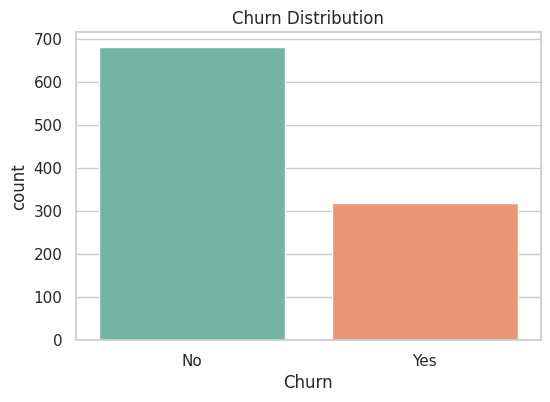

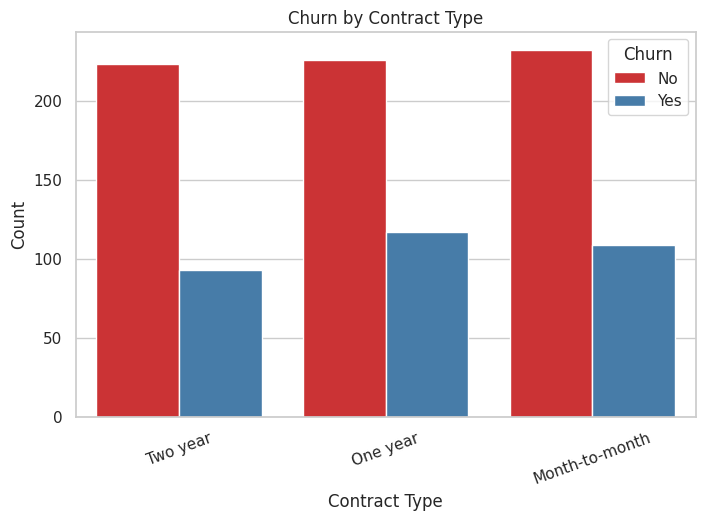

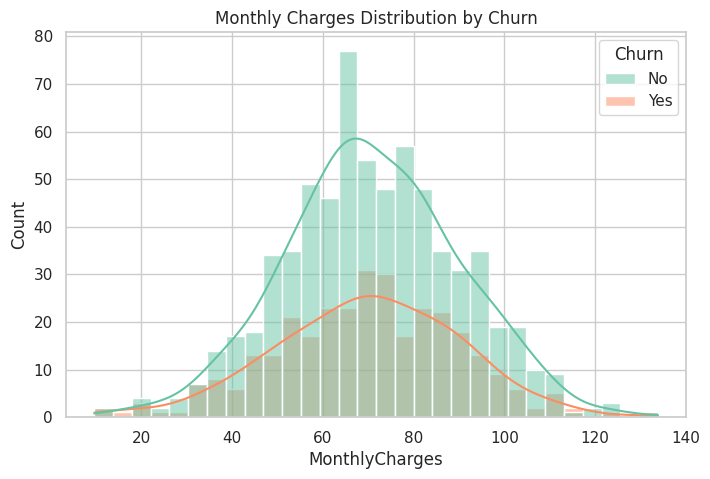

<ipython-input-4-1900645510>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='Tenure', palette='Set3')


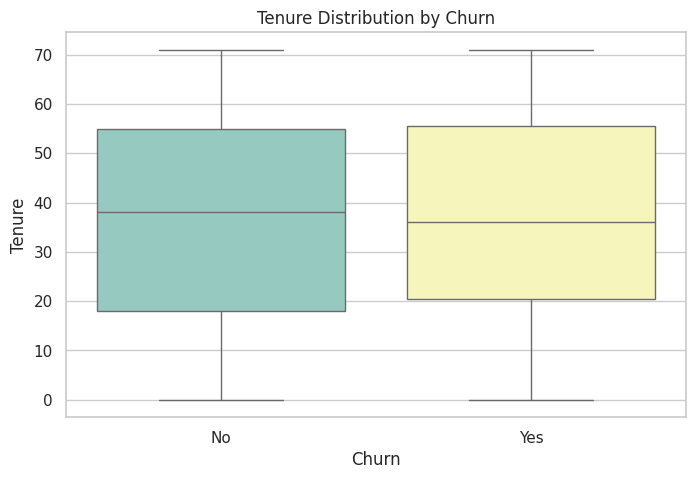

<ipython-input-4-1900645510>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Churn', y='CustServiceCalls', palette='coolwarm')


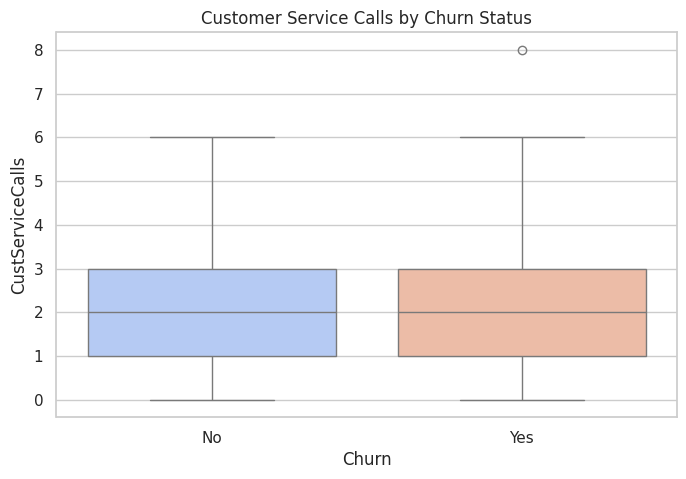

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Generate sample churn dataset
np.random.seed(42)
n = 1000
data = pd.DataFrame({
    'Churn': np.random.choice(['Yes', 'No'], size=n, p=[0.3, 0.7]),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'], size=n),
    'MonthlyCharges': np.random.normal(70, 20, size=n),
    'Tenure': np.random.randint(0, 72, size=n),
    'CustServiceCalls': np.random.poisson(2, size=n)
})

# Plot 1: Churn count
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.show()

# Plot 2: Churn by contract type
plt.figure(figsize=(8,5))
sns.countplot(data=data, x='Contract', hue='Churn', palette='Set1')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.legend(title='Churn')
plt.show()

# Plot 3: Monthly charges vs churn
plt.figure(figsize=(8,5))
sns.histplot(data=data, x='MonthlyCharges', hue='Churn', bins=30, kde=True, palette='Set2')
plt.title('Monthly Charges Distribution by Churn')
plt.show()

# Plot 4: Tenure vs churn
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Churn', y='Tenure', palette='Set3')
plt.title('Tenure Distribution by Churn')
plt.show()

# Plot 5: Customer Service Calls vs churn
plt.figure(figsize=(8,5))
sns.boxplot(data=data, x='Churn', y='CustServiceCalls', palette='coolwarm')
plt.title('Customer Service Calls by Churn Status')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset (replace with your file)
df = pd.read_csv('/content/drive/MyDrive/paper/archive (2).zip')  # Upload dataset in Colab

# Preview data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# Convert target to binary
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Handle missing values
df = df.dropna()

# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models
lr = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train models
lr.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:51:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {'Logistic Regression': lr, 'Random Forest': rf, 'XGBoost': xgb}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"📌 {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("-" * 30)

📌 Logistic Regression
Accuracy: 0.8239886444286728
Precision: 0.6971608832807571
Recall: 0.5924932975871313
------------------------------
📌 Random Forest
Accuracy: 0.8076650106458482
Precision: 0.7142857142857143
Recall: 0.45576407506702415
------------------------------
📌 XGBoost
Accuracy: 0.78708303761533
Precision: 0.6166134185303515
Recall: 0.517426273458445
------------------------------


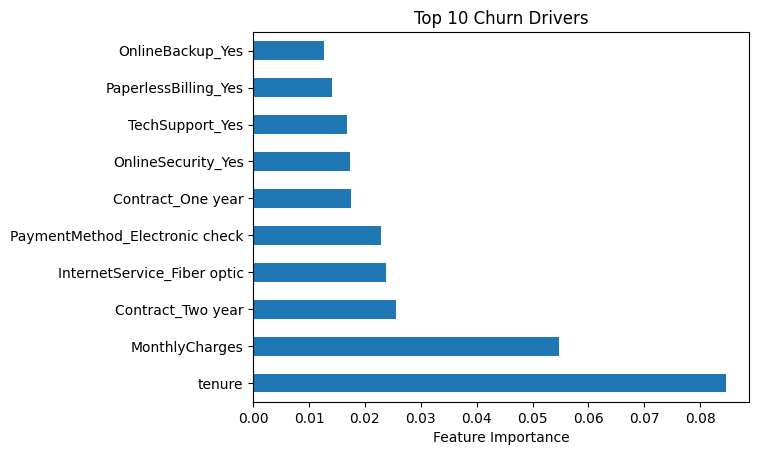

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature importance from Random Forest
feat_imp = pd.Series(rf.feature_importances_, index=X.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Top 10 Churn Drivers')
plt.xlabel('Feature Importance')
plt.show()

In [ ]:
# Save a summary report
report = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    report["Model"].append(name)
    report["Accuracy"].append(accuracy_score(y_test, y_pred))
    report["Precision"].append(precision_score(y_test, y_pred))
    report["Recall"].append(recall_score(y_test, y_pred))

pd.DataFrame(report).to_csv("churn_model_report.csv", index=False)